In [54]:
import matplotlib.pyplot as plt
import numpy as np

# https://jwalton.info/Embed-Publication-Matplotlib-Latex/
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predefined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = (fig_width_pt * inches_per_pt) * subplots[1]
    # Figure height in inches
    # print(fig_width_in,subplots)
    fig_height_in = (fig_width_in * golden_ratio * (subplots[0] / subplots[1]))
    # print(fig_height_in,subplots, subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

width = 345
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)


In [83]:
# features = np.array(['Fp1_Delta','F3_Delta','F4_Delta','C3_Delta','P4_Delta','F3_Theta','C3_Theta','T4_Theta','P4_Theta','F3_Alpha','F4_Alpha','F7_Alpha','T6_Alpha','P4_Alpha','F3_Beta','F3_Gamma','T3_Gamma','F3_Slow','F3_Low_beta','T4_Low_beta','C3_relative_gamma','alpha_frontal','alpha_temporal','alpha_asymmetry','beta_frontal'])
rank_lr = [14,4,24,20,1,2,7,18,13,11,10,9,0,12,15,8,19,5,3,6,16,22,23,21,17]
rank_boost = [1,24,6,8,2,15,16,12,19,3,11,9,14,18,10,13,20,0,5,4,7,21,23,17,22]
rank_ada = [8,19,4,15,14,24,1,2,13,11,12,7,6,5,3,9,20,21,0,23,16,17,18,22,10]
rank_rf = [1,24,15,6,3,16,7,19,9,8,5,2,20,4,11,0,14,13,10,12,17,21,23,18,22]
rank_lda = [17,10,14,5,18,20,24,2,1,13,4,7,21,6,9,11,3,0,23,22,16,8,19,15,12]
rank_ensemble = [24,1,2,14,4,15,8,6,20,7,19,13,11,9,5,3,10,18,16,12,0,17,21,23,22]
features = [
r"FP1$_{\delta}$",
r"F3$_{\delta}$",
r"F4$_{\delta}$",
r"C3$_{\delta}$",
r"P4$_{\delta}$",
r"F3$_{\theta}$",
r"C3$_{\theta}$",
r"T4$_{\theta}$",
r"P4$_{\theta}$",
r"F3$_{\alpha}$",
r"F4$_{\alpha}$",
r"F7$_{\alpha}$",
r"T6$_{\alpha}$",
r"P4$_{\alpha}$",
r"F3$_{\beta}$",
r"F3$_{\gamma}$",
r"T3$_{\gamma}$",
r"F3$_{slow}$",
r"F3$_{Low\beta}$",
r"T4$_{Low\beta}$",
r"C3$_{RG}$",
r"$\alpha_{f}$",
r"$\alpha_{t}$",
r"$\alpha_{a}$",
r"$\beta_{f}$"]
features = np.array(features)

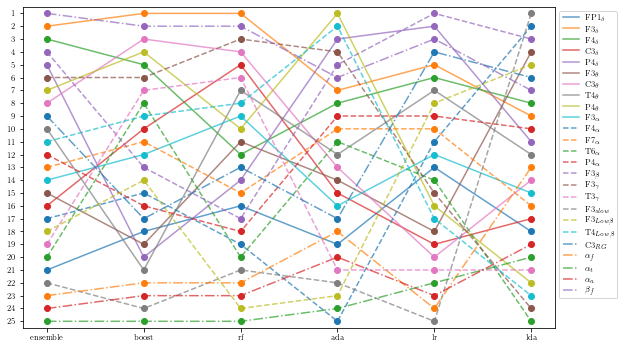

In [84]:
fig,ax = plt.subplots(1,1, figsize=set_size(width=width,fraction=2,subplots=(1,1)))
linestyles = ['-','--','-.']
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
for i in range(25):
    pos_array = []
    x = []
    pos_array.append(1 + rank_ensemble.index(i))
    x.append('ensemble')
    pos_array.append(1 + rank_boost.index(i))
    x.append('boost')
    pos_array.append(1 + rank_rf.index(i))
    x.append('rf')
    pos_array.append(1 + rank_ada.index(i))
    x.append('ada')
    pos_array.append(1 + rank_lr.index(i))
    x.append('lr')
    pos_array.append(1 + rank_lda.index(i))
    x.append('lda')
    # x = ['lr','ada','boost','rf','ensemble','lda',]
    ax.plot(x,pos_array, label=features[i], linestyle=linestyles[i//10], alpha=0.7, linewidth=1.5)
    ax.scatter(x,pos_array)
# plt.legend()
ax.set_ylim([0.5,25.5])
ax.set_yticks(list(range(1,25+1)))
ax.set_ylim(ax.get_ylim()[::-1])
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig(f'./figures/bump_chart.png',dpi=900)
plt.show()
